In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [66]:
# 데이터 로드 및 데이터 호출 방식 확인
df = load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [67]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [68]:
# 데이터, 타겟 분리 저장 및 shape 확인
df_X = df['data']
df_y = df['target']

type(df_X), type(df_y), df_X.shape, df_y.shape

(numpy.ndarray, numpy.ndarray, (442, 10), (442,))

각 train 데이터의 수치는 다음의 값들을 의미한다

In [69]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [70]:
# train date 확인, 정규화 등으로 수치가 변경 되었을 것으로 예상
df_X[0,:]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [71]:
# target 확인, 혈중당색소 수치가 아닐까 생각
df_y[:3]

array([151.,  75., 141.])

In [72]:
# train/test를 8:2로 분리, random seed 사용
train_x , test_x, train_y,  test_y = train_test_split(df_X, df_y, test_size = 0.2, random_state = 23 )
train_x.shape, test_x.shape

((353, 10), (89, 10))

In [73]:
# 10개 특성에 대한 다중 선형함수 제안
def model(X, W, b):
    predictions = 0
    for i in range(10):
        # i번째 특성[Xi]* i번째 가중치[Wi]
        predictions += X[:, i] * W[i]
    # 마지막 상수 더해줌
    predictions += b
    return predictions

def MSE(a, b):
    # 평균 제곱 오차를 손실함수로 사용
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):

    # 예측값을 구하고 실제와 차이를 손실함수로 표현함
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    # 각 10 개 가중치에 대해서 dot 연산을 통해 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # 상수항 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [75]:
# 모델 파라미터 random 초기화
W = np.random.rand(10)
b = np.random.rand()

# 가중치 업데이트 반영비율 고정
# 간단한 다중 회귀함수여서 반영 비율을 늘려서 값을 빠르게 수렴시키고자 함
LEARNING_RATE = 0.5

# loss log 작성할 리스트 생성
losses = []

for i in range(1, 100001):
    # train에 대한 가중치 계산
    dW, db = gradient(train_x, W, b, train_y)
    # 반영
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    # 예측값에 대한 손실계산
    L = loss(train_x, W, b, train_y)
    # loss 값 history 저장
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 2812.3553
Iteration 20000 : Loss 2805.1446
Iteration 30000 : Loss 2800.1276
Iteration 40000 : Loss 2796.6365
Iteration 50000 : Loss 2794.2072
Iteration 60000 : Loss 2792.5169
Iteration 70000 : Loss 2791.3406
Iteration 80000 : Loss 2790.5222
Iteration 90000 : Loss 2789.9526
Iteration 100000 : Loss 2789.5563


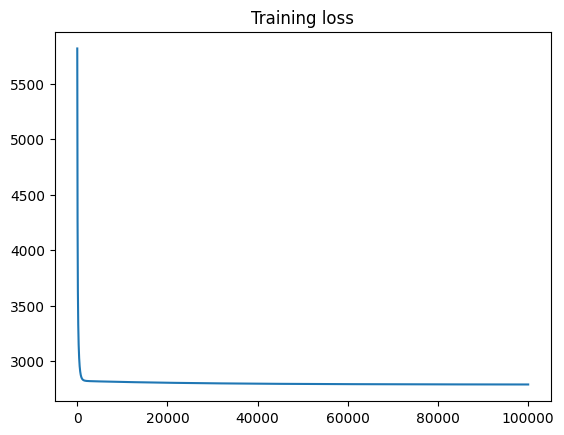

In [76]:
plt.title("Training loss")
plt.plot(losses)
plt.show()

In [77]:
prediction = model(test_x, W, b)
mse = loss(test_x, W, b, test_y)
print('Test loss :',mse)

Test loss : 3161.154890356083


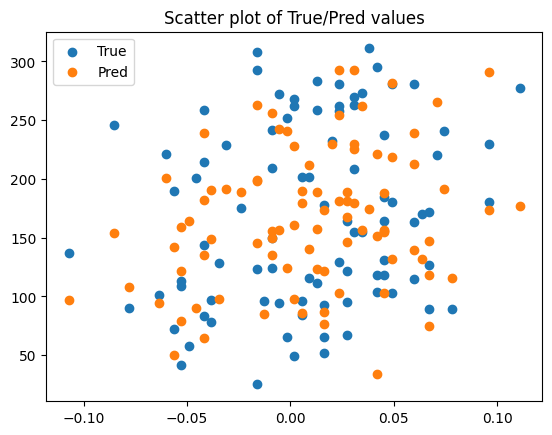

In [78]:
plt.title('Scatter plot of True/Pred values')
plt.scatter(test_x[:, 0], test_y, label = 'True')
plt.scatter(test_x[:, 0], prediction, label = 'Pred')
plt.legend()
plt.show()